In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
import warnings
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imread, imshow
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input, LeakyReLU
from keras.models import Sequential


warnings.filterwarnings("ignore")

In [6]:
# creating train dataset

TRAIN_ROOT = "data/training_set"
DESTINATION = "data/train/images"

if not os.path.exists(DESTINATION):
    os.makedirs(DESTINATION)
    
    for dir in os.listdir(TRAIN_ROOT):
        for img in os.listdir(os.path.join(TRAIN_ROOT, dir)):
            ORIGIN = os.path.join(TRAIN_ROOT, dir, img)
            # if some images could not be read
            try:
                imread(ORIGIN)
                shutil.copy(ORIGIN, DESTINATION)
            except:
                print(f"image at {ORIGIN} had not been read")
                

the image at data/training_set\engraving\249.jpg cannot be read
the image at data/training_set\engraving\304.jpg cannot be read
the image at data/training_set\engraving\356.jpg cannot be read
the image at data/training_set\engraving\89.png cannot be read
the image at data/training_set\iconography\331.jpg cannot be read
the image at data/training_set\iconography\69.jpg cannot be read
the image at data/training_set\painting\0000.jpg cannot be read
the image at data/training_set\painting\0025.jpg cannot be read
the image at data/training_set\painting\0050.jpg cannot be read
the image at data/training_set\painting\0075.jpg cannot be read
the image at data/training_set\painting\0125.jpg cannot be read
the image at data/training_set\painting\0150.jpg cannot be read
the image at data/training_set\painting\0175.jpg cannot be read
the image at data/training_set\painting\0200.jpg cannot be read
the image at data/training_set\painting\0225.jpg cannot be read
the image at data/training_set\paintin

In [8]:
# total quantity of images
len(os.listdir("data/train/images"))

4744

In [32]:
training_datagen = ImageDataGenerator(rescale=1/255, 
                                     featurewise_center=True,
                                     rotation_range=40,
                                     horizontal_flip=True)
train = training_datagen.flow_from_directory("data/train", target_size=(256,256),
                                            batch_size=2000,
                                            shuffle=True)

Found 4744 images belonging to 1 classes.


In [33]:
# visualize the images
t_img, label = train.next()


def plotImage(img_arr, label):
    plt.figure(figsize=(5,5))
    for img, l in zip(img_arr, label):
        plt.imshow(img)
        plt.title(img.shape)
        plt.axis("off")
        plt.show()

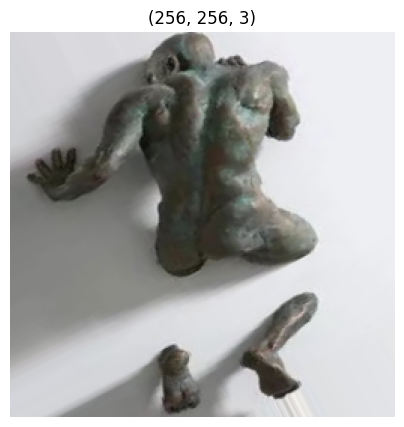

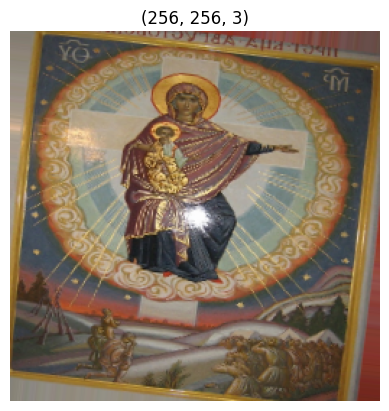

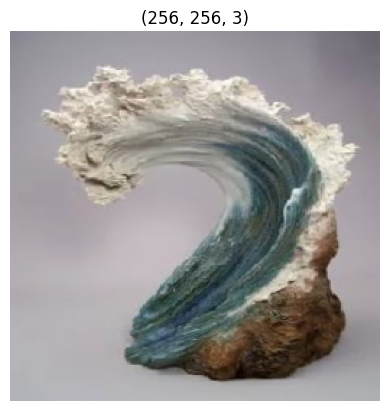

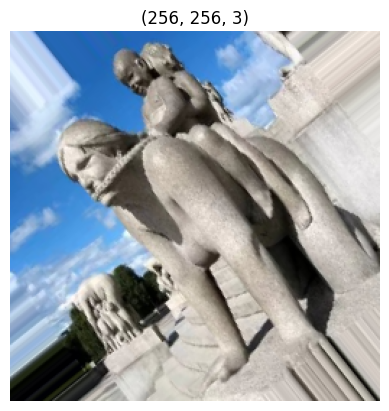

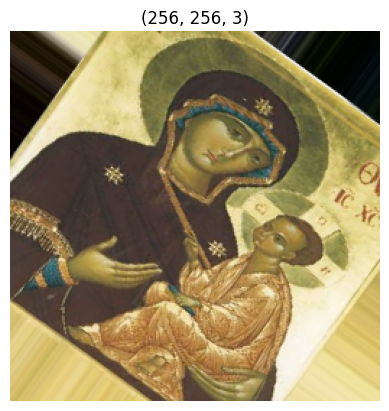

In [34]:
plotImage(t_img[:5], label[:5])

In [35]:
X = []
y = []
for image in t_img:
    try:
        lab = rgb2lab(image)
        X.append(lab[:,:,0])
        y.append(lab[:,:,1:] / 128)
    except:
        print("Error")

In [36]:
X_train = np.array(X)
X_train = np.expand_dims(X_train, axis=len(X_train.shape))
y_train = np.array(y)
X_train.shape, y_train.shape

((2000, 256, 256, 1), (2000, 256, 256, 2))

In [37]:
# Build our Model
# encoder
model = Sequential()

model.add(Conv2D(64, (3,3), activation="relu", padding="same", strides=2, input_shape=(256,256,1)))
model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(Conv2D(128, (3,3), activation="relu", padding="same", strides=2))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(Conv2D(256, (3,3), activation="relu", padding="same", strides=2))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))

# decoder
model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32, (3,3), activation="relu", padding="same"))
model.add(Conv2D(16, (3,3), activation="relu", padding="same"))
model.add(Conv2D(2, (3,3), activation=LeakyReLU(alpha=0.01), padding="same"))
model.add(UpSampling2D((2,2)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_26 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 512)      

In [38]:
model.compile(optimizer="adam", metrics=["acc"], loss="mse")

In [40]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, steps_per_epoch=X_train.shape[0]//64, verbose=1)

Epoch 1/30
31/31 [==============================] - 368s 12s/step - loss: 0.0138 - acc: 0.7223
Epoch 2/30
31/31 [==============================] - 373s 12s/step - loss: 0.0111 - acc: 0.7728
Epoch 3/30
31/31 [==============================] - 372s 12s/step - loss: 0.0102 - acc: 0.7772
Epoch 4/30
31/31 [==============================] - 372s 12s/step - loss: 0.0107 - acc: 0.7706
Epoch 5/30
31/31 [==============================] - 373s 12s/step - loss: 0.0102 - acc: 0.7807
Epoch 6/30
31/31 [==============================] - 373s 12s/step - loss: 0.0103 - acc: 0.7701
Epoch 7/30
31/31 [==============================] - 375s 12s/step - loss: 0.0100 - acc: 0.7758
Epoch 8/30
31/31 [==============================] - 373s 12s/step - loss: 0.0098 - acc: 0.7800
Epoch 9/30
31/31 [==============================] - 374s 12s/step - loss: 0.0098 - acc: 0.7736
Epoch 10/30
31/31 [==============================] - 373s 12s/step - loss: 0.0099 - acc: 0.7702
Epoch 11/30
31/31 [==============================

In [44]:
model.save("./bestmodel.h5")

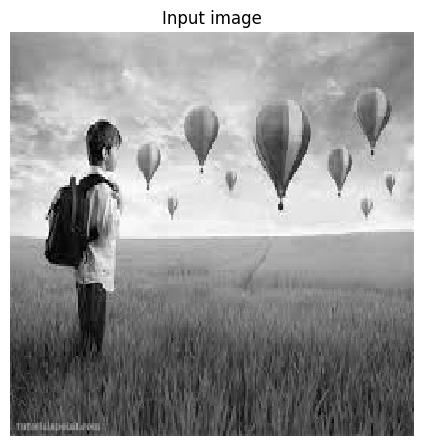

In [45]:
colored_img = []
PATH = "grayimage.jpeg"

img = img_to_array(load_img(PATH, target_size=(256,256,3))) / 255

plt.title("Input image")
imshow(img)
plt.axis("off")
plt.show()

In [46]:
colored_img.append(img)
colored_img = rgb2lab(colored_img)[:,:,:,0]
colored_img = colored_img.reshape(colored_img.shape + (1,))

In [47]:
output = model.predict(colored_img)
output = output * 128

1/1 [==============================] - 0s 414ms/step


In [48]:
result = np.zeros((256,256,3))
result[:,:,0] = colored_img[0][:,:,0]
result[:,:,1:] = output[0]

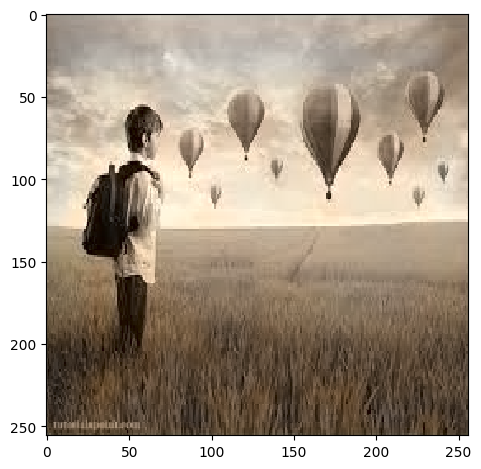

In [49]:
imshow(lab2rgb(result))